<a href="https://colab.research.google.com/github/shravanikalapure/Data-Mining-Warehousing/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving india_retail_dataset2.csv to india_retail_dataset2.csv


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
import warnings
warnings.filterwarnings('ignore')

# Patch Jupyter's session to suppress utcnow warnings
import datetime
import jupyter_client.session

def patched_utcnow():
    return datetime.datetime.now(datetime.timezone.utc)

jupyter_client.session.utcnow = patched_utcnow


In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv("india_retail_dataset2.csv")

In [54]:
df.shape

(2000, 13)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     2000 non-null   int64  
 1   Date               2000 non-null   object 
 2   Customer_Name      2000 non-null   object 
 3   Product            2000 non-null   object 
 4   Total_Item         2000 non-null   int64  
 5   Total_Cost         2000 non-null   float64
 6   Payment_Method     2000 non-null   object 
 7   City               2000 non-null   object 
 8   Store_Type         2000 non-null   object 
 9   Discount_          2000 non-null   bool   
 10  Customer_Category  2000 non-null   object 
 11  Season             2000 non-null   object 
 12  Promotion          1489 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 189.6+ KB


In [56]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Item,Total_Cost,Payment_Method,City,Store_Type,Discount_,Customer_Category,Season,Promotion
0,100000000,02-08-2023 03:48,Customer_13,"['Detergent', 'Biscuits', 'Butter', 'Eggs', 'B...",5,499.69,Cash,Jaipur,Grocery Store,True,Businessperson,Rainy,NaN
1,100000001,03-04-2024 05:26,Customer_358,"['Oil', 'Snacks', 'Butter', 'Toothpaste', 'Bis...",7,642.77,UPI,Delhi,Convenience Store,False,Homemaker,Summer,NaN
2,100000002,03-04-2020 22:34,Customer_117,"['Bread', 'Detergent', 'Eggs', 'Shampoo', 'Sna...",5,767.93,Mobile Payment,Surat,Department Store,True,Professional,Spring,Festive Offer
3,100000003,06-07-2021 21:50,Customer_353,"['Detergent', 'Oil', 'Milk', 'Biscuits', 'Vege...",9,1437.54,Cash,Hyderabad,Convenience Store,False,Businessperson,Spring,10% OFF
4,100000004,25-03-2021 04:43,Customer_261,"['Bread', 'Milk', 'Eggs', 'Butter', 'Soap', 'S...",8,1377.02,Mobile Payment,Jaipur,Pharmacy,False,Student,Rainy,Festive Offer


In [57]:
df.tail()

,Transaction_ID,Date,Customer_Name,Product,Total_Item,Total_Cost,Payment_Method,City,Store_Type,Discount_,Customer_Category,Season,Promotion
1995,100001995,03-04-2021 08:47,Customer_443,"['Cold Drink', 'Milk']",2,303.70,Mobile Payment,Ahmedabad,Grocery Store,True,Student,Rainy,10% OFF
1996,100001996,06-06-2022 12:15,Customer_159,"['Snacks', 'Rice', 'Milk', 'Spices', 'Vegetabl...",9,1329.79,UPI,Pune,Department Store,False,Businessperson,Winter,10% OFF
1997,100001997,03-02-2023 19:49,Customer_310,"['Cold Drink', 'Shampoo', 'Tea']",3,215.18,Cash,Jaipur,Supermarket,False,Homemaker,Winter,NaN
1998,100001998,04-11-2022 03:49,Customer_88,"['Shampoo', 'Sugar']",2,262.08,Mobile Payment,Jaipur,Supermarket,False,Homemaker,Winter,10% OFF
1999,100001999,07-05-2021 03:42,Customer_174,['Coffee'],1,261.73,Mobile Payment,Kolkata,Pharmacy,True,Businessperson,Rainy,Festive Offer


In [58]:
df.describe(include = 'all')

,Transaction_ID,Date,Customer_Name,Product,Total_Item,Total_Cost,Payment_Method,City,Store_Type,Discount_,Customer_Category,Season,Promotion
count,2.000000e+03,2000,2000,2000,2000.000000,2000.000000,2000,2000,2000,2000,2000,2000,1489
unique,NaN,2000,493,1786,NaN,NaN,4,10,5,2,4,4,3
top,NaN,27-07-2020 22:31,Customer_74,['Toothpaste'],NaN,NaN,Mobile Payment,Kolkata,Grocery Store,True,Businessperson,Rainy,BOGO (Buy One Get One)
freq,NaN,1,11,16,NaN,NaN,510,229,432,1020,520,512,513
mean,1.000010e+08,NaN,NaN,NaN,5.546500,854.154770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.774946e+02,NaN,NaN,NaN,2.857608,481.828264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+08,NaN,NaN,NaN,1.000000,12.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000005e+08,NaN,NaN,NaN,3.000000,457.415000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000010e+08,NaN,NaN,NaN,6.000000,828.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000015e+08,NaN,NaN,NaN,8.000000,1223.292500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Item',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type', 'Discount_',
       'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

In [60]:
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_Name,0
Product,0
Total_Item,0
Total_Cost,0
Payment_Method,0
City,0
Store_Type,0
Discount_,0


In [61]:
# Convert product names to lowercase and strip extra spaces
df['Product'] = df['Product'].str.lower().str.strip()

# Drop any null or missing product names
df.dropna(subset=['Product'], inplace=True)

In [62]:
# Drop unnecessary column (Promotion has many missing values)
df.drop(columns=['Promotion'], inplace=True)

In [63]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [64]:
# Convert 'Product' column from string to actual list
df['Product'] = df['Product'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [65]:
# One-hot encode all products (convert to 0/1 format)
mlb = MultiLabelBinarizer()
product_df = pd.DataFrame(mlb.fit_transform(df['Product']),
                          columns=mlb.classes_,
                          index=df.index)

In [66]:
# Combine with Transaction_ID
basket = pd.concat([df[['Transaction_ID']], product_df], axis=1)

In [67]:
# Group by Transaction_ID to remove duplicates
basket_grouped = basket.groupby('Transaction_ID').max()
print("\n Basket shape after grouping:", basket_grouped.shape)


 Basket shape after grouping: (2000, 20)



Detected 0 Outlier Transactions (Z-score > 3)


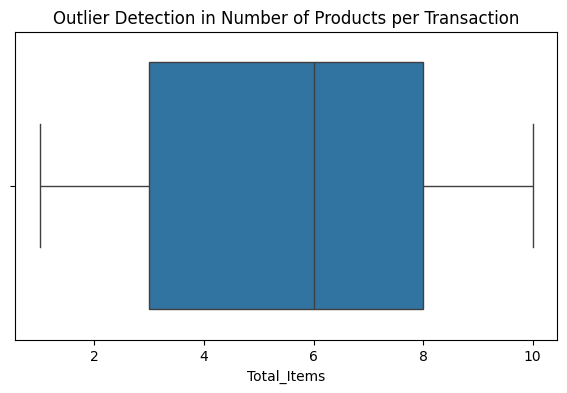

In [49]:
# OUTLIER DETECTION
# Detect transactions with unusually high product counts
import seaborn as sns
basket_grouped['Total_Items'] = basket_grouped.sum(axis=1)

z_scores = np.abs((basket_grouped['Total_Items'] - basket_grouped['Total_Items'].mean()) /
                  basket_grouped['Total_Items'].std())

outliers = basket_grouped[z_scores > 3]
print(f"\nDetected {len(outliers)} Outlier Transactions (Z-score > 3)")

# Visualize distribution
plt.figure(figsize=(7,4))
sns.boxplot(x=basket_grouped['Total_Items'])
plt.title("Outlier Detection in Number of Products per Transaction")
plt.show()

In [72]:
# Ensure all values are boolean (True/False)
basket_grouped = basket_grouped.astype(bool)

# Now apply Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket_grouped, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets Found:")
print(frequent_itemsets.head())



Frequent Itemsets Found:
   support     itemsets
0   0.2780   (biscuits)
1   0.2915      (bread)
2   0.2885     (butter)
3   0.2810  (chocolate)
4   0.2715     (coffee)


In [73]:
# Apply Apriori Algorithm
print("\n Frequent Itemsets Found:")
print(frequent_itemsets.head())


 Frequent Itemsets Found:
   support     itemsets
0   0.2780   (biscuits)
1   0.2915      (bread)
2   0.2885     (butter)
3   0.2810  (chocolate)
4   0.2715     (coffee)


In [74]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules[(rules['confidence'] > 0.4) & (rules['lift'] > 1.2)]
rules_sorted = rules.sort_values(by='lift', ascending=False)
print("\nTop 5 Strongest Rules:")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Top 5 Strongest Rules:
                             antecedents consequents  support  confidence  \
12096         (shampoo, soap, detergent)  (biscuits)   0.0165    0.600000   
9289             (shampoo, soap, butter)  (biscuits)   0.0150    0.566038   
31177  (toothpaste, shampoo, cold drink)      (eggs)   0.0155    0.543860   
34589               (milk, shampoo, tea)      (eggs)   0.0130    0.541667   
21378              (milk, butter, sugar)    (coffee)   0.0140    0.538462   

           lift  
12096  2.158273  
9289   2.036107  
31177  2.006862  
34589  1.998770  
21378  1.983284  


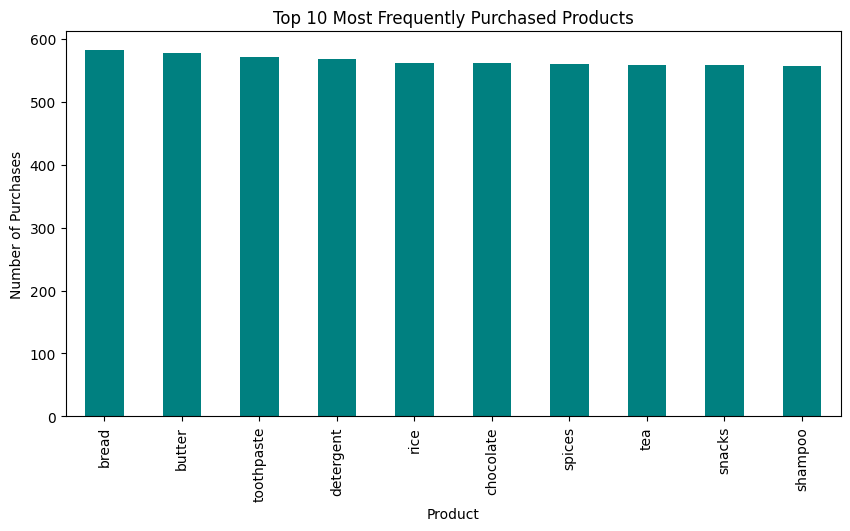

In [75]:
# Visualization — Top 10 Most Purchased Products
item_frequency = product_df.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
item_frequency.plot(kind='bar', color='teal')
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Product")
plt.ylabel("Number of Purchases")
plt.show()

In [76]:
# Define Recommendation Function

def recommend_items(product_name, rules_df):
      product_name = product_name.lower().strip()
      filtered_rules = rules_df[rules_df['antecedents'].apply(lambda x: product_name in x)]
      if filtered_rules.empty:
          return []
      # Sort by confidence and lift
      filtered_rules = filtered_rules.sort_values(by=['confidence', 'lift'], ascending=False)
      recommendations = []
      for _, row in filtered_rules.iterrows():
          recommendations.extend(list(row['consequents']))
      return list(dict.fromkeys(recommendations))  # remove duplicates but preserve order


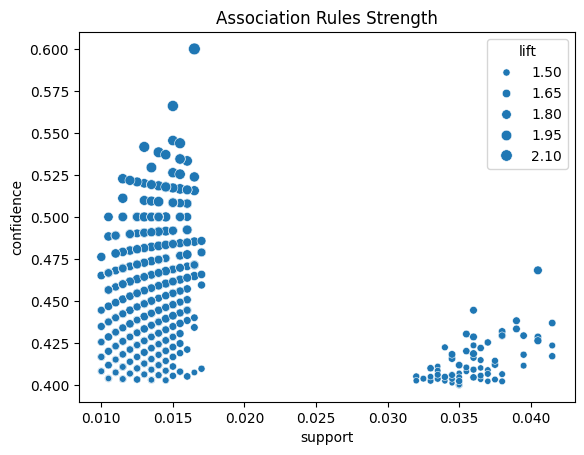

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
plt.title("Association Rules Strength")
plt.show()

In [78]:
# Example Recommendation
product_query = 'tea'  # change this to any item you want to test
recommended = recommend_items(product_query, rules_sorted)

print(f"\n Recommended Products for '{product_query}': {recommended if recommended else 'No strong associations found.'}")


 Recommended Products for 'tea': ['eggs', 'bread', 'biscuits', 'rice', 'chocolate', 'toothpaste', 'fruits', 'shampoo', 'detergent', 'cold drink', 'vegetables', 'spices', 'soap', 'butter', 'sugar', 'snacks', 'coffee', 'milk', 'oil']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

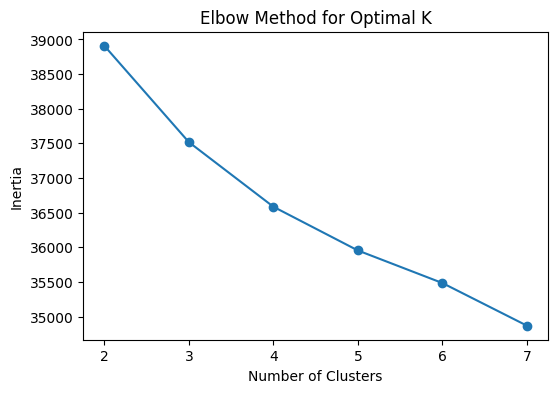


K-Means Silhouette Score: 0.080


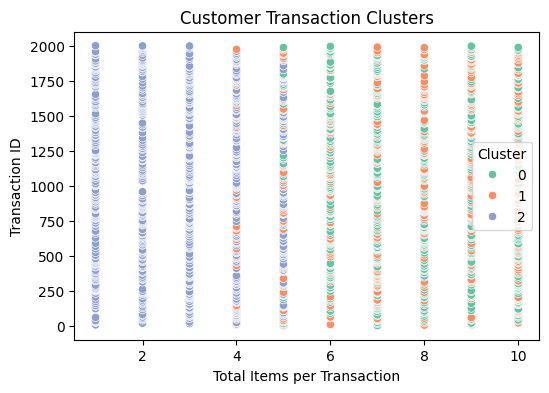


KNN Classification Report:
              precision    recall  f1-score   support

         Low       0.73      0.80      0.76       296
      Medium       0.79      0.71      0.75       304

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



In [21]:
# STEP 5: K-MEANS CLUSTERING
# ------------------------------
# Prepare data (remove ID column)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, silhouette_score

basket_grouped.reset_index(inplace=True)
# Remove any non-numeric columns before scaling
clustering_data = basket_grouped.select_dtypes(include=[np.number])
clustering_data = clustering_data.drop(columns=['Total_Items'], errors='ignore')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Elbow method (optional)
inertias = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,8), inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Apply final clustering
kmeans = KMeans(n_clusters=3, random_state=42)
basket_grouped['Cluster'] = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, basket_grouped['Cluster'])
print(f"\nK-Means Silhouette Score: {silhouette_avg:.3f}")

# Visualize clusters by total items
plt.figure(figsize=(6,4))
sns.scatterplot(data=basket_grouped, x='Total_Items', y=basket_grouped.index, hue='Cluster', palette='Set2')
plt.title("Customer Transaction Clusters")
plt.xlabel("Total Items per Transaction")
plt.ylabel("Transaction ID")
plt.show()

# STEP 6: KNN CLASSIFICATION
# Create synthetic labels (e.g., High/Medium/Low basket size)
basket_grouped['Purchase_Level'] = pd.cut(basket_grouped['Total_Items'],
                                          bins=[0, 5, 10, 50],
                                          labels=['Low', 'Medium', 'High'])

# Features and target
X = basket_grouped.drop(columns=['Cluster', 'Purchase_Level'])
y = basket_grouped['Purchase_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred))